# Machine Learning and Statistic Project
***

## Introduction
***

This document has been created to trains a model using Power Production dataset as part of the project for Machine Learning Project module in GMIT.

## Evaluating the Data

***

As first step we will understand the dataset.


In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sys
import scipy
import sklearn 
from sklearn import linear_model
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

In [3]:
# load dataset
data= pd.read_csv("powerproduction.csv")

In [4]:
#Check dimention - 2 variables speed and power and 500 data for each
print (data.shape)

(500, 2)


In [5]:
# To see head to evaluate if the information is good
print(data.head(5))

   speed  power
0  0.000    0.0
1  0.125    0.0
2  0.150    0.0
3  0.225    0.0
4  0.275    0.0


In [6]:
# In the tail we noticed data have zero power with the max speed given, probably there is information missed
print(data.tail(5))

      speed  power
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0


In [7]:
# MAx Speed 25 and max power is 113.56 
print(data.describe())

            speed       power
count  500.000000  500.000000
mean    12.590398   48.014584
std      7.224991   41.614572
min      0.000000    0.000000
25%      6.324750    5.288000
50%     12.550500   41.645500
75%     18.775250   93.537000
max     25.000000  113.556000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A767FB6A0>,
      dtype=object)

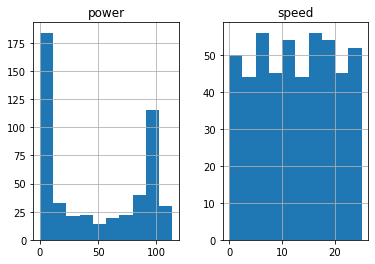

In [8]:
# Histogram to get an idea of the distribution
data.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A76F749A0>,
      dtype=object)

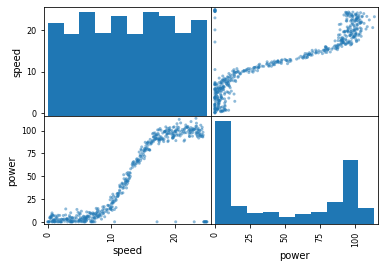

In [9]:
# Plot to spot structured relationships between input variables.
scatter_matrix(data)

## Model and Training
***

### Linear Regression
***

In [10]:
# Training model 
regr = linear_model.LinearRegression()

train_x = np.array(train[["speed"]])
train_y = np.array(train[["power"]])

regr.fit(train_x,train_y)

# Slope
print ("Coefficient:", regr.coef_)
# Intercept
print ("Intercept:", regr.intercept_)

NameError: name 'train' is not defined

In [11]:
# Plotting the best fit line
plt.scatter(train["speed"], train["power"], color="blue")
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, "-r")
plt.xlabel("Speed")
plt.ylabel("Power")

NameError: name 'train' is not defined

In [12]:
# Predicting values:
# Function for predicting future values :
def get_regression_predictions(input_features,intercept,slope):
 predicted_values = input_features*slope + intercept
 return predicted_values

In [13]:
# Predicting power:
wspeed = 0.325
epower = get_regression_predictions(wspeed,regr.intercept_[0],regr.coef_[0][0])
print ("Estimated Power :", epower)

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

In [ ]:
# Checking various accuracy:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

test_x = np.array(test[["speed"]])
test_y = np.array(test[["power"]])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y, test_y_) )


### Polynomial Regression
***

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Training the model

poly3 = PolynomialFeatures(degree=3)

train_x = np.array(train[["speed"]])
train_y = np.array(train[["power"]])
train_x_poly3 = poly3.fit_transform(train_x)
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, train_y)

#The coefficients
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)

# Plotting the best fit line
plt.scatter(train.speed, train.power,  color='blue')
XX = np.array(train[["speed"]])
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Speed")
plt.ylabel("Power")

test_x_poly3 = poly3.fit_transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y, test_y3_) )

In [ ]:
# Predicting values:
# Function for predicting future values :
def get_rp(input_features,intercept,slope):
 predicted_v = input_features*slope + intercept + input_features*slope**2 + input_features*slope**3
 return predicted_v

In [ ]:
# Predicting power:
wspeed = 0.325
epower = get_rp(wspeed,clf.intercept_[0],clf.coef_[0][0])
print ("Estimated Power :", epower)

### Comparison between Linear and Polynomial Regression
***

## References
***

https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

https://github.com/anandprabhakar0507/Python-polynomial-regression/blob/master/ML0101EN-Reg-Polynomial-Regression-Co2-py-v1.py

https://medium.com/towards-artificial-intelligence/machine-learning-algorithms-for-beginners-with-python-code-examples-ml-19c6afd60daa

https://github.com/anandprabhakar0507/Python-polynomial-regression/blob/master/ML0101EN-Reg-Polynomial-Regression-Co2-py-v1.py
    
https://www.statworx.com/ch/blog/how-to-build-a-machine-learning-api-with-python-and-flask/